# **Predicting Health Insurance Costs**

***Introduction:***

In this repository, we aim to leverage the datasets from "Machine Learning with R" by Brett Lantz to explore and build predictive model for individual medical costs billed by health insurance.









***Dataset Description:***

  **Age:** Age of the primary beneficiary.

  **sex:** Gender of the insurance contractor (female, male).

  **bmi:** Body Mass Index, a ratio of height to weight providing an objective index of body weight.

  **children:** Number of children covered by health insurance or number of dependents.

  **smoker:** Smoking status.

  **region:**The beneficiary's residential area in the US (northeast, southeast, southwest, northwest).

  **charges:** Individual medical costs billed by health insurance.

In [2]:
# Import Libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import DataSet

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.shape

(1338, 7)

In [5]:
# Create features and labels

X = insurance.drop(["charges"],axis=1)
y = insurance ["charges"]

X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# create training and test sets

from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test = train_test_split(X , y,test_size=0.2,random_state=42)
len(X_train),len(X_test)

(1070, 268)

In [8]:
# Noramilze features

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(),["sex","smoker","region"])
)

# fit the column transformer in the training set
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal  = ct.transform(X_test)

X_train_normal


array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [9]:
# Create a model

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=(11,),activation="relu"))
model.add(tf.keras.layers.Dense(20,activation="relu"))
model.add(tf.keras.layers.Dense(50,activation="relu"))
model.add(tf.keras.layers.Dense(70,activation="relu"))
model.add(tf.keras.layers.Dense(40,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="relu"))

model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

history=model.fit(X_train_normal,y_train,epochs=300)


Epoch 1/300
34/34 [==============================] - 2s 3ms/step - loss: 13345.4717 - mae: 13345.4717
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 13328.4570 - mae: 13328.4570
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 13046.4072 - mae: 13046.4072
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 10693.8760 - mae: 10693.8760
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 7762.9507 - mae: 7762.9507
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 7507.9531 - mae: 7507.9531
Epoch 7/300
34/34 [==============================] - 0s 4ms/step - loss: 7229.3198 - mae: 7229.3198
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 6936.1431 - mae: 6936.1431
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 6585.7324 - mae: 6585.7324
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 6123.1992 - mae: 6

In [10]:
# Evaluate the model
model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1724.9763 - mae: 1724.9763


[1724.976318359375, 1724.976318359375]

Text(0, 0.5, 'loss')

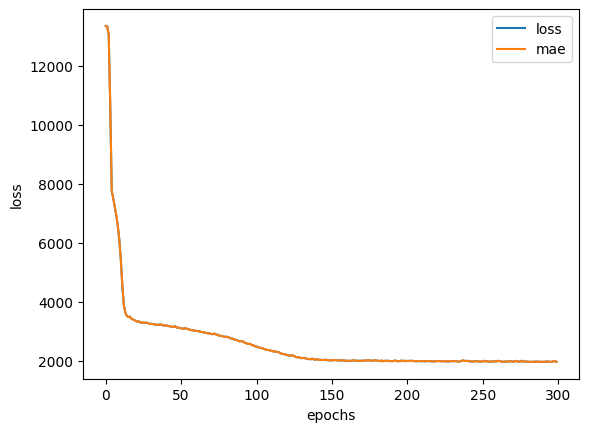

In [11]:
# Visualize the loss curve

pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [12]:
# Saving the model(HDF5)

model.save("Medical_cost.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
